<a href="https://colab.research.google.com/github/ivanshauck/measuring-offensive-baseball-value/blob/main/baseball_cleaning_and_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to create a baseball statistic that gives insight into overall offensive value, by measuring ones offensive production, weighted by linear regression coefficients that relate offensive outcomes in baseball, to runs scored. The data is mlb game logs that data back from the 1880's, I only used game logs from 1980 to 2016 though, and after data cleaning there were 123,270 rows that would be used for the training and test set of the linear regression, data link: https://data.world/dataquest/mlb-game-logs. The features are the line score for each team, the ballpark played in, the date, etc..

In [ ]:
import pandas as pd

import numpy as np
from scipy import stats

In [ ]:
games = pd.read_csv('/content/game_logs.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (12,13,14,15,19,20,76,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
games.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 161 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    date                          171907 non-null  object 
 1    number_of_game                171907 non-null  int64  
 2    day_of_week                   171907 non-null  object 
 3    v_name                        171907 non-null  object 
 4    v_league                      171907 non-null  object 
 5    v_game_number                 171907 non-null  int64  
 6    h_name                        171907 non-null  object 
 7    h_league                      171907 non-null  object 
 8    h_game_number                 171907 non-null  int64  
 9    v_score                       171907 non-null  int64  
 10   h_score                       171907 non-null  int64  
 11   length_outs                   140841 non-null  float64
 12   day_night                   

In [ ]:
pd.set_option('display.max_columns',None)
games.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,1871-05-04,0,Thu,CL1,na,1,FW1,na,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,6.0,1.0,-1.0,-1.0,-1.0,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,-1.0,-1.0,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,False,boakj901,John Boake,NaN,(none),NaN,(none),NaN,(none),NaN,(none),NaN,(none),paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,(none),NaN,(none),prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1871-05-05,0,Fri,BS1,na,1,WS3,na,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,-1.0,5.0,3.0,-1.0,-1.0,-1.0,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,-1.0,2.0,1.0,-1.0,-1.0,-1.0,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,False,dobsh901,Henry Dobson,NaN,(none),NaN,(none),NaN,(none),NaN,(none),NaN,(none),wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,(none),NaN,(none),spala101,Al Spalding,brai

I start by extracting the year for each record, out of the date column, and creating a column for the year.

In [ ]:
games['year'] = games['date'].str[0:4]

I check the value counts for the different years, it looks like we're missing the entire 1970's, my plan was to use data from 1969 (the year the mound was lowered again), but I'll have to go with 1980.

In [ ]:
pd.set_option('display.max_rows',None)
games['year'].value_counts()

2013    2431
2007    2431
2005    2431
2003    2430
2014    2430
2012    2430
2010    2430
2009    2430
2015    2429
2011    2429
2000    2429
2006    2429
2001    2429
2016    2428
2004    2428
2008    2428
2002    2426
1983    2109
1982    2107
1989    2106
1980    2105
1987    2105
1984    2105
1986    2103
1985    2103
1988    2100
1969    1946
1914    1880
1915    1864
1964    1626
1968    1625
1965    1623
1962    1621
1967    1620
1963    1619
1966    1615
1890    1611
1884    1544
1961    1430
1981    1394
1910    1249
1904    1249
1917    1247
1916    1247
1908    1244
1941    1244
1947    1243
1946    1242
1944    1242
1909    1241
1953    1240
1949    1240
1937    1239
1956    1239
1952    1239
1951    1239
1959    1238
1950    1238
1943    1238
1936    1238
1922    1238
1911    1237
1905    1237
1954    1237
1948    1237
1931    1236
1927    1236
1960    1236
1940    1236
1958    1235
1957    1235
1955    1234
1920    1234
1926    1234
1913    1234
1930    1234
1923    1233

In [ ]:
games = games.loc[games['year']>='1980']
games.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61635 entries, 110272 to 171906
Data columns (total 162 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    date                          61635 non-null  object 
 1    number_of_game                61635 non-null  int64  
 2    day_of_week                   61635 non-null  object 
 3    v_name                        61635 non-null  object 
 4    v_league                      61635 non-null  object 
 5    v_game_number                 61635 non-null  int64  
 6    h_name                        61635 non-null  object 
 7    h_league                      61635 non-null  object 
 8    h_game_number                 61635 non-null  int64  
 9    v_score                       61635 non-null  int64  
 10   h_score                       61635 non-null  int64  
 11   length_outs                   61635 non-null  float64
 12   day_night                     61635 no

The v in v team stands for visitors, I will now create a dataframe with just the line scores from visiting teams, and I'll create new column names for the offensive stats. FOr example, instead of v_homeruns, I'll call the column home_runs. I'll also do this on the original dataframe for the home team stats. This is so I can later concatenate the home and away line scores into a single dataframe. For each new set of columns, I'll also create a singles column, which is just hits minus home runs minus triples minus doubles.

In [ ]:
v_stats = games.iloc[:, np.r_[3,7,9:49,161]]

NameError: ignored

In [ ]:
v_stats.head()

In [ ]:
v_stats['team'] = v_stats['v_name']
v_stats['score'] = v_stats['v_score']
v_stats['at_bats'] = v_stats['v_at_bats']
v_stats['hits'] = v_stats['v_hits']
v_stats['doubles'] = v_stats['v_doubles']
v_stats['triples'] = v_stats['v_triples']
v_stats['home_runs'] = v_stats['v_homeruns']
v_stats['rbi'] = v_stats['v_rbi']
v_stats['sacrifice_hits'] = v_stats['v_sacrifice_hits']
v_stats['sacrifice_flies'] = v_stats['v_sacrifice_flies']
v_stats['walks'] = v_stats['v_walks']
v_stats['stolen_bases'] = v_stats['v_stolen_bases']
v_stats['home/away'] = 'away'
v_stats['singles'] = v_stats['hits'] - v_stats['doubles'] - v_stats['triples'] - v_stats['home_runs']
v_stats['ballpark'] = v_stats['park_id']
v_stats.info()

In [ ]:
games['team'] = games['h_name']
games['score'] = games['h_score']
games['at_bats'] = games['h_at_bats']
games['hits'] = games['h_hits']
games['doubles'] = games['h_doubles']
games['triples'] = games['h_triples']
games['home_runs'] = games['h_homeruns']
games['rbi'] = games['h_rbi']
games['sacrifice_hits'] = games['h_sacrifice_hits']
games['sacrifice_flies'] = games['h_sacrifice_flies']
games['walks'] = games['h_walks']
games['stolen_bases'] = games['h_stolen_bases']
games['home/away'] = 'home'
games['singles'] = games['hits'] - games['doubles'] - games['triples'] - games['home_runs']
games['ballpark'] = games['park_id']
games.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61635 entries, 110272 to 171906
Data columns (total 177 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    date                          61635 non-null  object 
 1    number_of_game                61635 non-null  int64  
 2    day_of_week                   61635 non-null  object 
 3    v_name                        61635 non-null  object 
 4    v_league                      61635 non-null  object 
 5    v_game_number                 61635 non-null  int64  
 6    h_name                        61635 non-null  object 
 7    h_league                      61635 non-null  object 
 8    h_game_number                 61635 non-null  int64  
 9    v_score                       61635 non-null  int64  
 10   h_score                       61635 non-null  int64  
 11   length_outs                   61635 non-null  float64
 12   day_night                     61635 no

I now concatenate the portions of the two dataframes that have the same column names, and save the new dataframe to a csv file for easier access.

In [ ]:
v_frame = v_stats.iloc[:, np.r_[1,41:57,57]]
h_frame = games.iloc[:, np.r_[7,161:176,176]]
data = pd.concat([v_frame,h_frame], axis=0)
data.to_csv('baseball.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
data = pd.read_csv('baseball.csv')

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,year,team,score,at_bats,hits,doubles,triples,home_runs,rbi,sacrifice_hits,sacrifice_flies,walks,stolen_bases,home/away,singles,ballpark,total_bases
0,0,110272,1980,TOR,6,36.0,9.0,1.0,1.0,2.0,5.0,0.0,0.0,5.0,2.0,away,5.0,SEA02,18.0
1,1,110273,1980,ATL,0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,away,3.0,CIN08,3.0
2,2,110274,1980,BAL,5,31.0,8.0,2.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,away,4.0,CHI10,14.0
3,3,110275,1980,DET,5,33.0,9.0,1.0,2.0,2.0,5.0,0.0,0.0,3.0,1.0,away,4.0,KAN06,20.0
4,4,110276,1980,BOS,5,35.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,away,8.0,MIL05,16.0


I create a total bases column as well, simply singles plus 2 times doubles plus 3 times triples plus 4 times home runs.

In [ ]:
data['total_bases'] = data['singles']+(2*data['doubles'])+(3*data['triples'])+(4*data['home_runs'])
data.info()
data.to_csv('baseball.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123270 entries, 0 to 123269
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       123270 non-null  int64  
 1   Unnamed: 0.1     123270 non-null  int64  
 2   year             123270 non-null  int64  
 3   team             123270 non-null  object 
 4   score            123270 non-null  int64  
 5   at_bats          123270 non-null  float64
 6   hits             123270 non-null  float64
 7   doubles          123270 non-null  float64
 8   triples          123270 non-null  float64
 9   home_runs        123270 non-null  float64
 10  rbi              123270 non-null  float64
 11  sacrifice_hits   123270 non-null  float64
 12  sacrifice_flies  123270 non-null  float64
 13  walks            123270 non-null  float64
 14  stolen_bases     123270 non-null  float64
 15  home/away        123270 non-null  object 
 16  singles          123270 non-null  floa

Next I look at the histograms for the various offensive outcomes, as well as the descriptive statistics for each variable. My main goal is to check the skewness and kurtosis for each to see if their values fall between 0 to 3, and thus approximate normality, since linear regressions perform better with normally distributed features (or independent variables for the non data science folks reading this).

(array([7.7140e+03, 3.1544e+04, 4.0255e+04, 2.9755e+04, 9.6140e+03,
        3.2660e+03, 9.1100e+02, 1.6800e+02, 3.4000e+01, 9.0000e+00]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]),
 <a list of 10 Patch objects>)

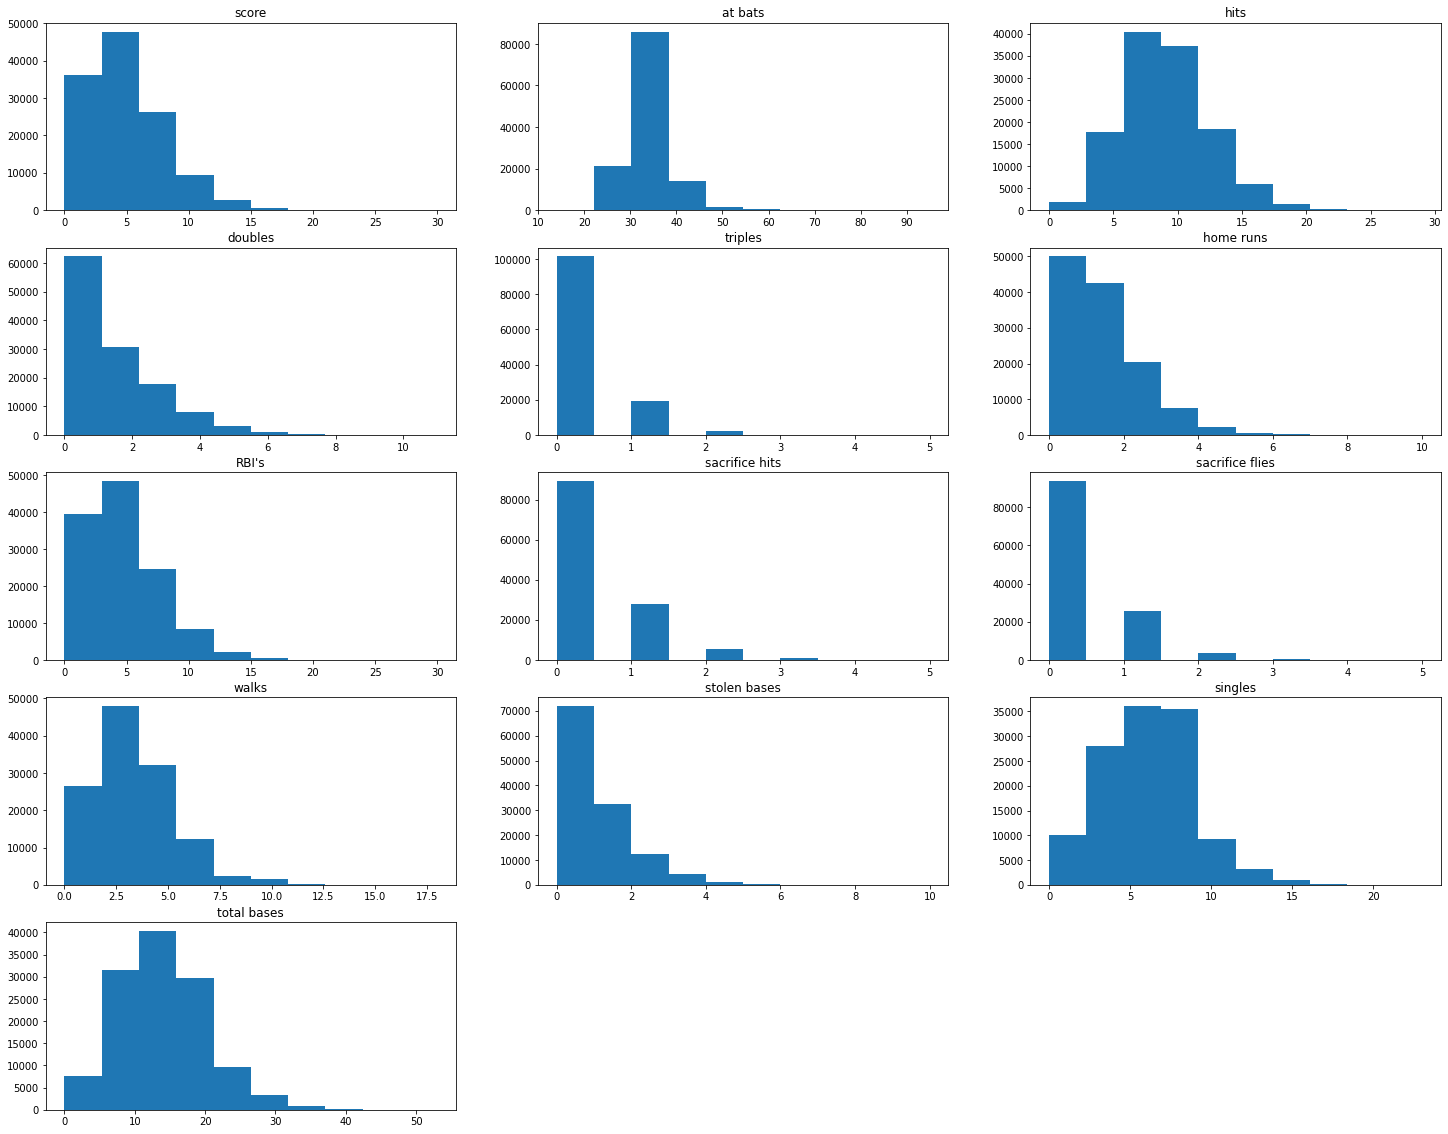

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.subplot(5,3,1)
plt.title('score')
plt.hist(data['score'])
plt.subplot(5,3,2)
plt.title('at bats')
plt.hist(data['at_bats'])
plt.subplot(5,3,3)
plt.title('hits')
plt.hist(data['hits'])
plt.subplot(5,3,4)
plt.title('doubles')
plt.hist(data['doubles'])
plt.subplot(5,3,5)
plt.title('triples')
plt.hist(data['triples'])
plt.subplot(5,3,6)
plt.title('home runs')
plt.hist(data['home_runs'])
plt.subplot(5,3,7)
plt.title('RBI\'s')
plt.hist(data['rbi'])
plt.subplot(5,3,8)
plt.title('sacrifice hits')
plt.hist(data['sacrifice_hits'])
plt.subplot(5,3,9)
plt.title('sacrifice flies')
plt.hist(data['sacrifice_flies'])
plt.subplot(5,3,10)
plt.title('walks')
plt.hist(data['walks'])
plt.subplot(5,3,11)
plt.title('stolen bases')
plt.hist(data['stolen_bases'])
plt.subplot(5,3,12)
plt.title('singles')
plt.hist(data['singles'])
plt.subplot(5,3,13)
plt.title('total bases')
plt.hist(data['total_bases'])

In [ ]:
print('score distribution: {}'.format(stats.describe(data['score'])))
print('at bats distribution: {}'.format(stats.describe(data['at_bats'])))
print('hits distribution: {}'.format(stats.describe(data['hits'])))
print('doubles distribution: {}'.format(stats.describe(data['doubles'])))
print('triples distribution: {}'.format(stats.describe(data['triples'])))
print('home runs distribution: {}'.format(stats.describe(data['home_runs'])))
print('RBI distribution: {}'.format(stats.describe(data['rbi'])))
print('sacrifice hit distribution: {}'.format(stats.describe(data['sacrifice_hits'])))
print('sacrifice fly distribution: {}'.format(stats.describe(data['sacrifice_flies'])))
print('walks distribution: {}'.format(stats.describe(data['walks'])))
print('stolen bases distribution: {}'.format(stats.describe(data['stolen_bases'])))
print('singles distribution: {}'.format(stats.describe(data['singles'])))
print('total bases distribution: {}'.format(stats.describe(data['total_bases'])))

score distribution: DescribeResult(nobs=123270, minmax=(0, 30), mean=4.474340877748033, variance=9.517318548834803, skewness=0.9548050497827644, kurtosis=1.2372251180244165)
at bats distribution: DescribeResult(nobs=123270, minmax=(14.0, 95.0), mean=34.16944106433033, variance=19.47844052023893, skewness=1.5068402416669266, kurtosis=6.41668556014058)
hits distribution: DescribeResult(nobs=123270, minmax=(0.0, 29.0), mean=8.893753549119818, variance=11.792725585774381, skewness=0.4973989965040013, kurtosis=0.376821902414441)
doubles distribution: DescribeResult(nobs=123270, minmax=(0.0, 11.0), mean=1.6943619696600958, variance=1.8771692929196617, skewness=0.8851401815911085, kurtosis=0.9115513201432761)
triples distribution: DescribeResult(nobs=123270, minmax=(0.0, 5.0), mean=0.1988399448365377, variance=0.20760478394496285, skewness=2.3847004728790138, kurtosis=6.144955913476048)
home runs distribution: DescribeResult(nobs=123270, minmax=(0.0, 10.0), mean=0.961750628701225, variance=1.

Fortunately here most of the features I plan on using for the linear regression; namely singles, doubles, walks, triples, home runs, sacrifice flies, and stolen bases, approximate normality. It seems as though triples, stolen bases, and sacrifice flies are the exception, with high kurtosis values. This is of course due to these outcomes being more rare, the majority of their values are concentrated on the lower end, since they rarely take place.
  

Next I'll take a look at outliers with boxplots for each variable. Most of them have outliers on the high end, I'll use this later on to see if a winsorized dataframe performs better in the linear regression.

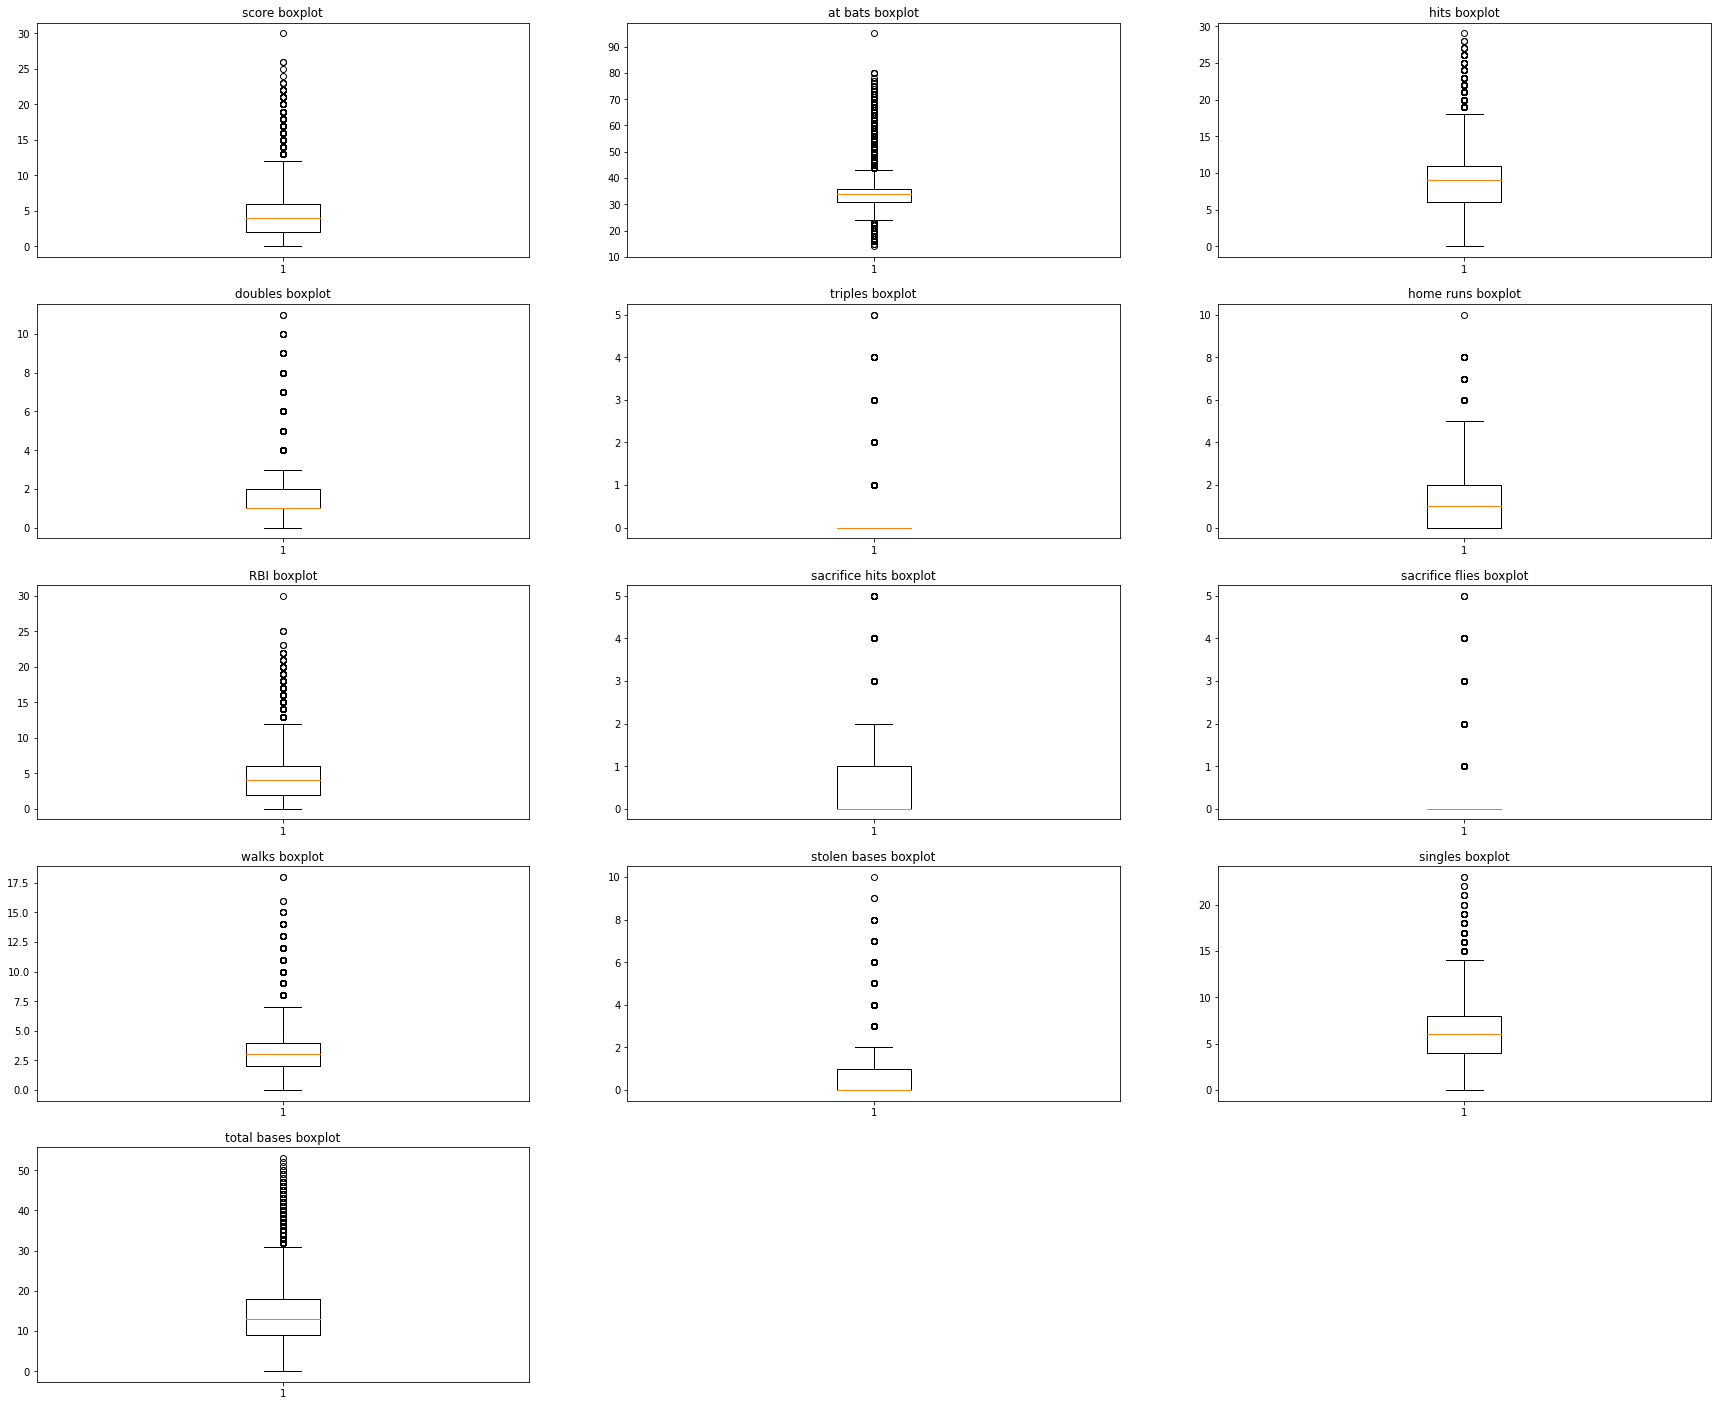

In [ ]:
plt.figure(figsize=(30,25))
plt.subplot(5,3,1)
plt.title('score boxplot')
plt.boxplot(data['score'])
plt.subplot(5,3,2)
plt.title('at bats boxplot')
plt.boxplot(data['at_bats'])
plt.subplot(5,3,3)
plt.title('hits boxplot')
plt.boxplot(data['hits'])
plt.subplot(5,3,4)
plt.title('doubles boxplot')
plt.boxplot(data['doubles'])
plt.subplot(5,3,5)
plt.title('triples boxplot')
plt.boxplot(data['triples'])
plt.subplot(5,3,6)
plt.title('home runs boxplot')
plt.boxplot(data['home_runs'])
plt.subplot(5,3,7)
plt.title('RBI boxplot')
plt.boxplot(data['rbi'])
plt.subplot(5,3,8)
plt.title('sacrifice hits boxplot')
plt.boxplot(data['sacrifice_hits'])
plt.subplot(5,3,9)
plt.title('sacrifice flies boxplot')
plt.boxplot(data['sacrifice_flies'])
plt.subplot(5,3,10)
plt.title('walks boxplot')
plt.boxplot(data['walks'])
plt.subplot(5,3,11)
plt.title('stolen bases boxplot')
plt.boxplot(data['stolen_bases'])
plt.subplot(5,3,12)
plt.title('singles boxplot')
plt.boxplot(data['singles'])
plt.subplot(5,3,13)
plt.title('total bases boxplot')
plt.boxplot(data['total_bases'])
plt.show()




Next I take a look at the relationships between the various offensive variables to runs scored. For hits, walks, total bases, rbi, at bats, and singles, I felt a scatter plot more appropriate as there are many instances of these outcomes. In the case of extra base hits, sacrifice flies, and stolen bases, I used a seaborn pointplot to relate the variables to the average runs scored for each of their values.

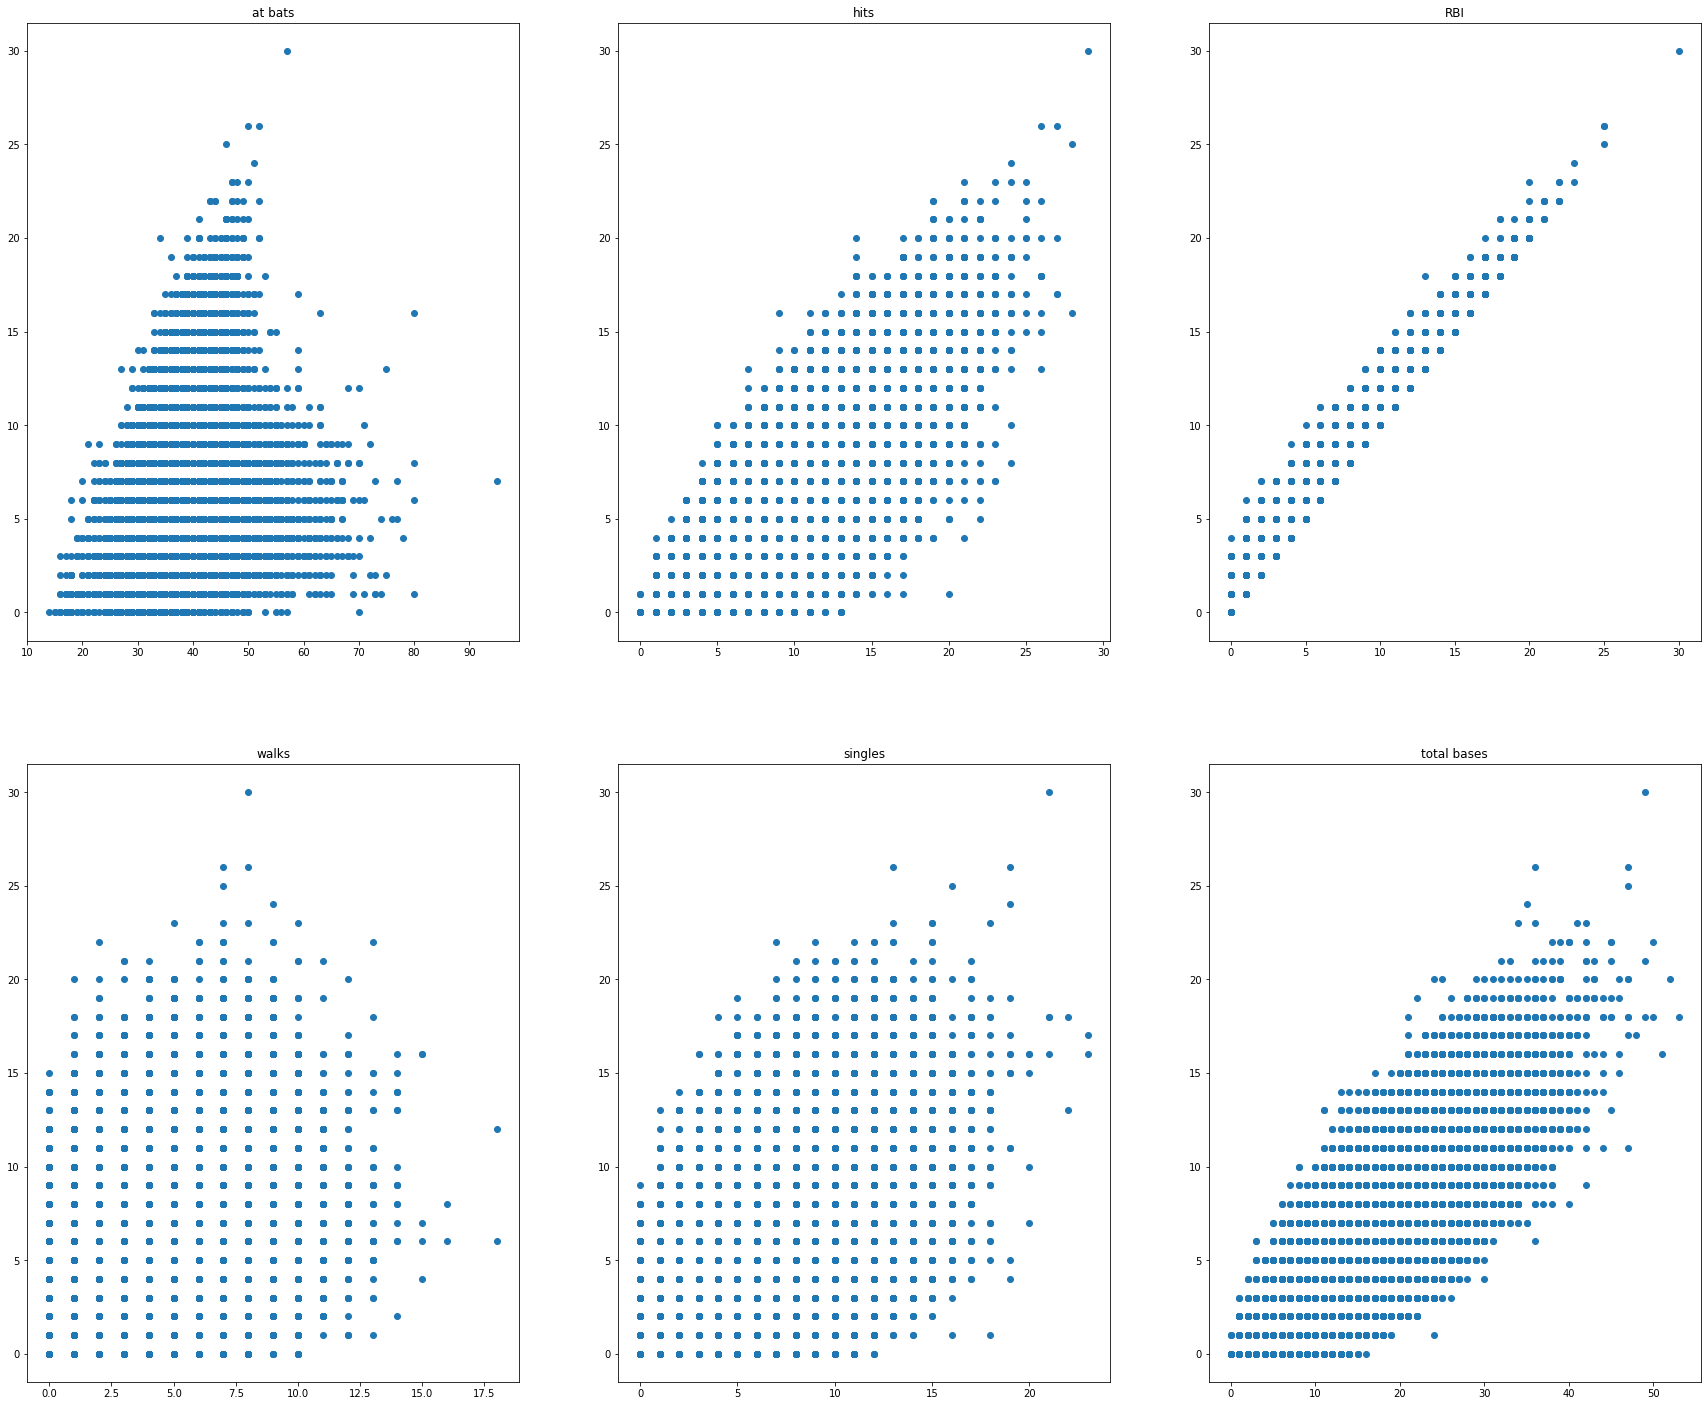

In [ ]:
plt.figure(figsize=(30,25))
plt.title('feature relationships with runs scored')
plt.subplot(2,3,1)
plt.title('at bats')
plt.scatter(data['at_bats'],data['score'])
plt.subplot(2,3,2)
plt.title('hits')
plt.scatter(data['hits'],data['score'])
plt.subplot(2,3,3)
plt.title('RBI')
plt.scatter(data['rbi'],data['score'])
plt.subplot(2,3,4)
plt.title('walks')
plt.scatter(data['walks'],data['score'])
plt.subplot(2,3,5)
plt.title('singles')
plt.scatter(data['singles'],data['score'])
plt.subplot(2,3,6)
plt.title('total bases')
plt.scatter(data['total_bases'],data['score'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

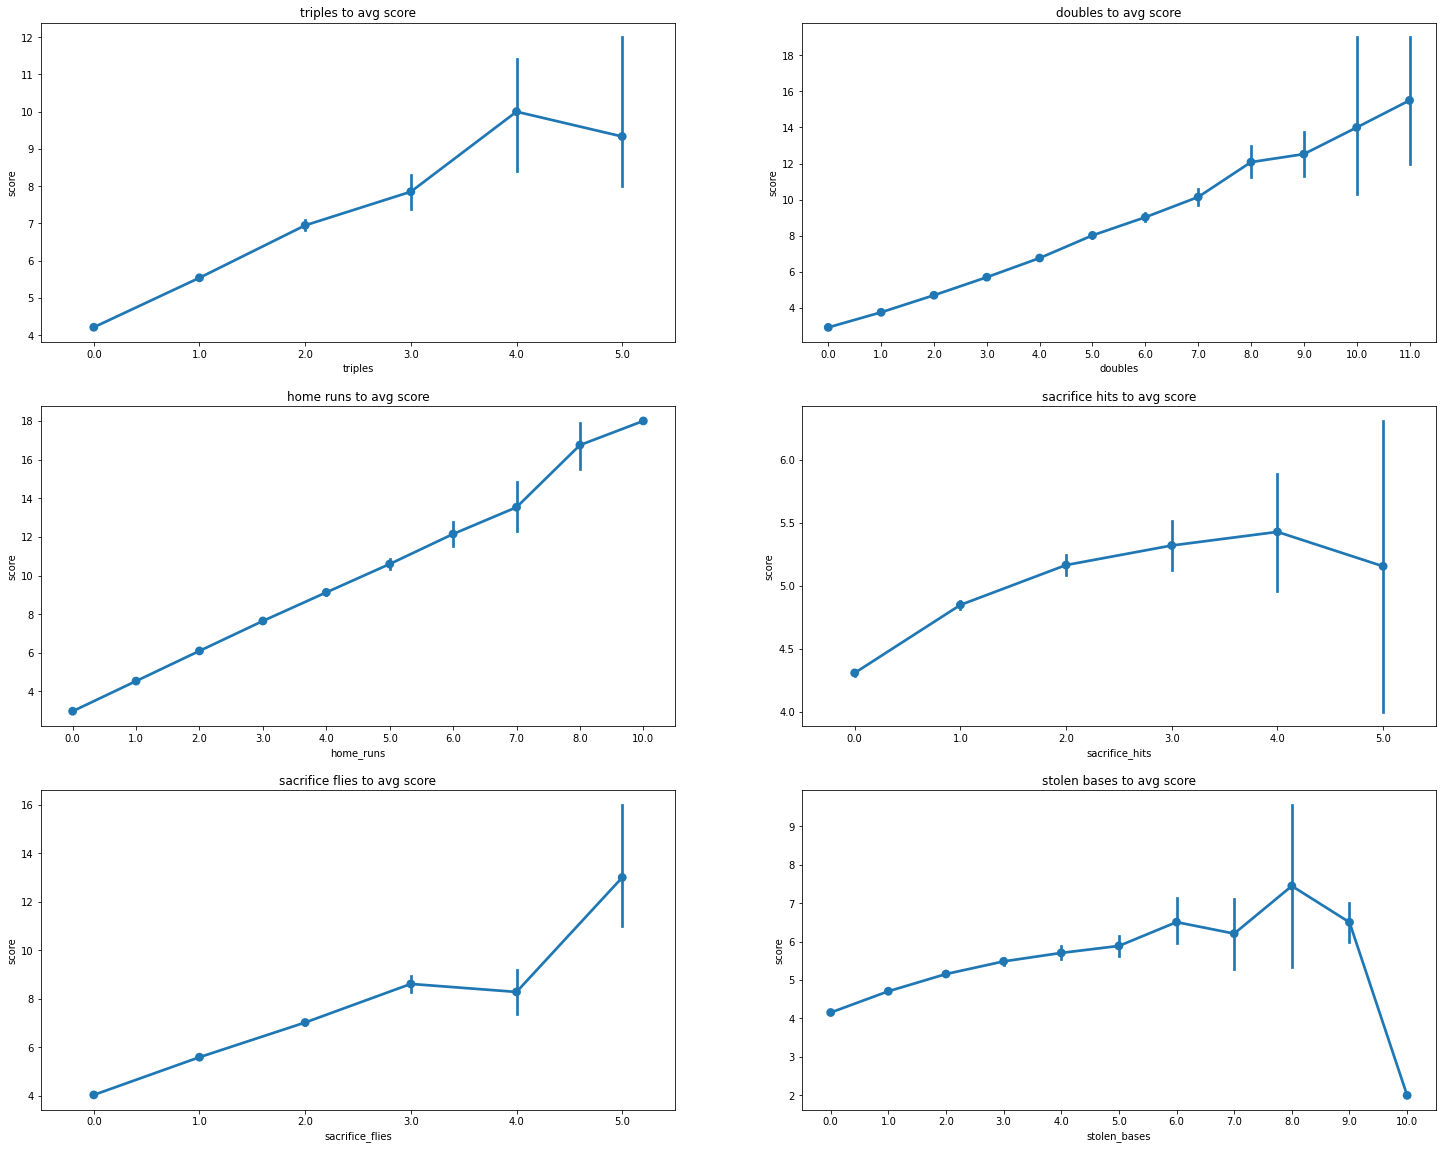

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
plt.title('triples to avg score')
sns.pointplot(data['triples'],data['score'])
plt.subplot(3,2,2)
plt.title('doubles to avg score')
sns.pointplot(data['doubles'],data['score'])
plt.subplot(3,2,3)
plt.title('home runs to avg score')
sns.pointplot(data['home_runs'],data['score'])
plt.subplot(3,2,4)
plt.title('sacrifice hits to avg score')
sns.pointplot(data['sacrifice_hits'],data['score'])
plt.subplot(3,2,5)
plt.title('sacrifice flies to avg score')
sns.pointplot(data['sacrifice_flies'],data['score'])
plt.subplot(3,2,6)
plt.title('stolen bases to avg score')
sns.pointplot(data['stolen_bases'],data['score'])


The good news from the scatterplots and the pointplots is that it does seem as though the offensive outcomes relate to runs scored in a linear fashion. This means I won't have to modify any of the features (such as taking their square and using that for the linear regression).

Next up I check for multicollinearity by looking at a correlation matrix for the frame. Once again we're lucky here, as it looks as though out of the following variables I had previously mentioned (e.g. singles, doubles, triples, home runs, stolen bases, sacrifice flies, and walks) there are no instances of correlation over .7, and in fact most are quite low. This tells us that this data is well suited for a linear regression.

In [ ]:
data.corr()

,Unnamed: 0,Unnamed: 0.1,year,score,at_bats,hits,doubles,triples,home_runs,rbi,sacrifice_hits,sacrifice_flies,walks,stolen_bases,singles,total_bases
Unnamed: 0,1.000000,0.500000,0.484816,0.020279,-0.157155,-0.024979,0.021478,0.011409,0.035378,0.023553,-0.025696,-0.005961,0.010928,-0.038568,-0.057413,0.010485
Unnamed: 0.1,0.500000,1.000000,0.969631,0.000004,0.001494,-0.015731,0.057150,-0.040555,0.068802,0.007790,-0.070994,-0.025510,-0.034230,-0.077509,-0.067742,0.032814
year,0.484816,0.969631,1.000000,0.017227,0.007311,-0.004131,0.074178,-0.042652,0.086554,0.025913,-0.068520,-0.021891,-0.020903,-0.087820,-0.068127,0.051731
score,0.020279,0.000004,0.017227,1.000000,0.487191,0.759718,0.438240,0.197229,0.524346,0.985845,0.088686,0.263578,0.353573,0.137511,0.500660,0.814625
at_bats,-0.157155,0.001494,0.007311,0.487191,1.000000,0.730458,0.349994,0.108905,0.249006,0.482118,0.030511,0.020015,0.138828,0.110169,0.627618,0.626199
hits,-0.024979,-0.015731,-0.004131,0.759718,0.730458,1.000000,0.490088,0.180199,0.348577,0.755384,0.109997,0.191766,0.170875,0.125863,0.845639,0.868183
doubles,0.021478,0.057150,0.074178,0.438240,0.349994,0.490088,1.000000,0.033845,0.059994,0.436852,0.042757,0.126420,0.124192,0.010808,0.085734,0.529882
triples,0.011409,-0.040555,-0.042652,0.197229,0.108905,0.180199,0.033845,1.000000,0.000316,0.195985,0.014011,0.104998,0.043558,0.033083,0.042512,0.255486
home_runs,0.035378,0.068802,0.086554,0.524346,0.249006,0.348577,0.059994,0.000316,1.000000,0.544358,-0.023157,-0.006738,0.082538,-0.012015,0.026171,0.714006
rbi,0.023553,0.007790,0.025913,0.985845,0.482118,0.755384,0.436852,0.195985,0.544358,1.000000,0.082446,0.265193,0.340804,0.124783,0.488511,0.821864


Just in case I'll create a winsorized frame, removing the top 10% of data for doubles, home runs, walks, stolen bases, and singles. This is in case the outliers mess with the linear regression performance significantly. I seriously doubt this will perform better, but better to be safe than sorry.

In [ ]:
from scipy.stats.mstats import winsorize
win_data = data.copy()
win_data['doubles'] = winsorize(win_data['doubles'],(0,0.10))
win_data['home_runs'] = winsorize(win_data['home_runs'],(0,0.10))
win_data['walks'] = winsorize(win_data['walks'],(0,0.10))
win_data['stolen_bases'] = winsorize(win_data['stolen_bases'],(0,0.10))
win_data['singles'] = winsorize(win_data['singles'],(0,0.10))

In [ ]:
win_data.to_csv('baseball_winsorized.csv')

In [ ]:
data_plus = data.copy()
data_plus['year'] = data_plus['year'].astype('str')
data_plus.head()

,Unnamed: 0,Unnamed: 0.1,year,team,score,at_bats,hits,doubles,triples,home_runs,rbi,sacrifice_hits,sacrifice_flies,walks,stolen_bases,home/away,singles,ballpark,total_bases
0,0,110272,1980,TOR,6,36.0,9.0,1.0,1.0,2.0,5.0,0.0,0.0,5.0,2.0,away,5.0,SEA02,18.0
1,1,110273,1980,ATL,0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,away,3.0,CIN08,3.0
2,2,110274,1980,BAL,5,31.0,8.0,2.0,2.0,0.0,4.0,1.0,1.0,1.0,0.0,away,4.0,CHI10,14.0
3,3,110275,1980,DET,5,33.0,9.0,1.0,2.0,2.0,5.0,0.0,0.0,3.0,1.0,away,4.0,KAN06,20.0
4,4,110276,1980,BOS,5,35.0,10.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,away,8.0,MIL05,16.0


I will also create a separate linear regression that takes the year, the offensive team performance in that particular year, and the ballpark played in into account. If it wasn't clear before my regression will be used to model and predict the score for each game. These variables will be added to the offensive outcomes, mainly to see how impactful they are, but they will also be used later to create adjustements for the statistic I plan on creating from the regression results. The variables are all categorical so I will label encode them, or replace their label with it's mean value in relation to the target variable, which is runs scored.

In [ ]:
year_means = data_plus.groupby('year')['score'].mean()
data_plus['year_enc'] = data_plus['year'].map(year_means)
ballpark_means = data_plus.groupby('ballpark')['score'].mean()
data_plus['ballpark_enc'] = data_plus['ballpark'].map(ballpark_means)
data_plus['spec_team'] = data_plus['team'] + data_plus['year']
team_means = data_plus.groupby('spec_team')['score'].mean()
data_plus['spec_team_enc'] = data_plus['spec_team'].map(team_means)

I'll also take a look at their distribution. The mean scores for ballpark and mean scores for specific team by year are well normally distributed. The year by year mean score distribution has a negative kurtosis, which could be problematic for linear regression.

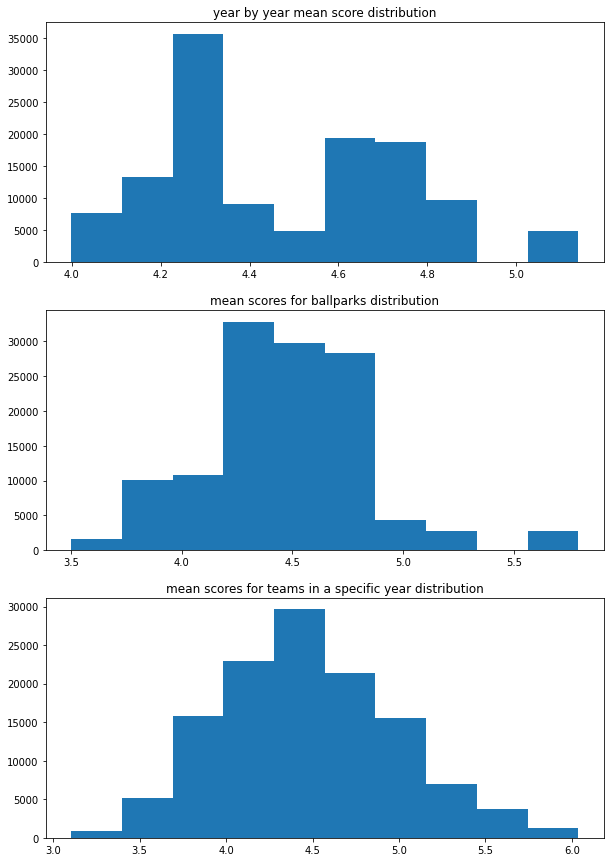

descriptive stats for target encoded year column: DescribeResult(nobs=123270, minmax=(3.998206599713056, 5.140181144503911), mean=4.474340877748033, variance=0.07706249448825299, skewness=0.4024848891283313, kurtosis=-0.6211081487861003)
descriptive stats for target encoded ballpark column: DescribeResult(nobs=123270, minmax=(3.5, 5.792089985486212), mean=4.474340877748033, variance=0.13915811242167808, skewness=0.7866285063493063, kurtosis=2.1763732297516905)
descriptive stats for target encoded yearly team column: DescribeResult(nobs=123270, minmax=(3.1037735849056602, 6.037037037037037), mean=4.474340877748033, variance=0.2587228852962136, skewness=0.29585173712218615, kurtosis=-0.06790300009854633)


In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.title('year by year mean score distribution')
plt.hist(data_plus['year_enc'])
plt.subplot(3,1,2)
plt.title('mean scores for ballparks distribution')
plt.hist(data_plus['ballpark_enc'])
plt.subplot(3,1,3)
plt.title('mean scores for teams in a specific year distribution')
plt.hist(data_plus['spec_team_enc'])
plt.show()
print('descriptive stats for target encoded year column: {}'.format(stats.describe(data_plus['year_enc'])))
print('descriptive stats for target encoded ballpark column: {}'.format(stats.describe(data_plus['ballpark_enc'])))
print('descriptive stats for target encoded yearly team column: {}'.format(stats.describe(data_plus['spec_team_enc'])))


None of those three label encoded variables have a correlation of over .55, so multicollinearity shouldn't be too much of an issue for these. 

In [ ]:
data_plus.corr()

,Unnamed: 0,Unnamed: 0.1,score,at_bats,hits,doubles,triples,home_runs,rbi,sacrifice_hits,sacrifice_flies,walks,stolen_bases,singles,total_bases,year_enc,ballpark_enc,spec_team_enc
Unnamed: 0,1.000000,0.500000,0.020279,-0.157155,-0.024979,0.021478,0.011409,0.035378,0.023553,-0.025696,-0.005961,0.010928,-0.038568,-0.057413,0.010485,0.000635,0.067499,0.000330
Unnamed: 0.1,0.500000,1.000000,0.000004,0.001494,-0.015731,0.057150,-0.040555,0.068802,0.007790,-0.070994,-0.025510,-0.034230,-0.077509,-0.067742,0.032814,0.001270,0.134998,0.000729
score,0.020279,0.000004,1.000000,0.487191,0.759718,0.438240,0.197229,0.524346,0.985845,0.088686,0.263578,0.353573,0.137511,0.500660,0.814625,0.089984,0.120920,0.164877
at_bats,-0.157155,0.001494,0.487191,1.000000,0.730458,0.349994,0.108905,0.249006,0.482118,0.030511,0.020015,0.138828,0.110169,0.627618,0.626199,0.030330,0.069431,0.065292
hits,-0.024979,-0.015731,0.759718,0.730458,1.000000,0.490088,0.180199,0.348577,0.755384,0.109997,0.191766,0.170875,0.125863,0.845639,0.868183,0.056505,0.111750,0.113228
doubles,0.021478,0.057150,0.438240,0.349994,0.490088,1.000000,0.033845,0.059994,0.436852,0.042757,0.126420,0.124192,0.010808,0.085734,0.529882,0.075367,0.102661,0.092664
triples,0.011409,-0.040555,0.197229,0.108905,0.180199,0.033845,1.000000,0.000316,0.195985,0.014011,0.104998,0.043558,0.033083,0.042512,0.255486,-0.009950,0.032194,0.001294
home_runs,0.035378,0.068802,0.524346,0.249006,0.348577,0.059994,0.000316,1.000000,0.544358,-0.023157,-0.006738,0.082538,-0.012015,0.026171,0.714006,0.107420,0.111212,0.158101
rbi,0.023553,0.007790,0.985845,0.482118,0.755384,0.436852,0.195985,0.544358,1.000000,0.082446,0.265193,0.340804,0.124783,0.488511,0.821864,0.093751,0.123025,0.167258
sacrifice_hits,-0.025696,-0.070994,0.088686,0.030511,0.109997,0.042757,0.014011,-0.023157,0.082446,1.000000,0.061886,0.131166,0.060373,0.122972,0.060999,-0.009303,-0.074210,-0.056700


I'll save the frame with the label encoded variables to a csv file, and that will do it for this notebook, next up will be modeling.

In [ ]:
data_plus.to_csv('baseball_plus.csv')